# Задача 1
Дана обучающая выборка
<table>
<tr><td>$x$</td><td>1</td><td>1</td><td>0</td><td>0</td><td>-1</td></tr>
<tr><td>$y$</td><td>4</td><td>4</td><td>0</td><td>2</td><td>6</td></tr>
</table>
1) изобразить точки;

2) методом наименьших квадратов построить модель вида $f(x) = \beta_0+\beta_1x+\beta_2x^2$;построить график этой функции;

3) построить модель того же вида методом ридж-регрессии с параметром регуляризации $\lambda = 1$; построить график этой функции.

Замечание: при ручных вычислениях по методу наименьших квадратов рекомендуется составить систему $X^⊤X\beta = X^⊤y$ и решить ее. Регуляризованная система: $(X^⊤X+\lambda I)\beta = X^⊤y$, где $I$ - единичная матрица.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Обучающая выборка:

In [2]:
x_train = [1, 1, 0, 0, -1]
y_train = [4, 4, 0 ,2,  6]

1) Изображение точек на плоскости $xy$

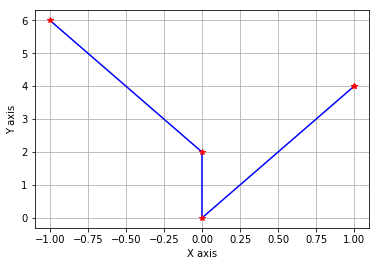

In [3]:
plt.plot(x_train,y_train,color='blue')
plt.plot(x_train,y_train,'*',color='red')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid()

2) Построим модель вида $f(x) = \beta_0+\beta_1x+\beta_2x^2$ методом МНК.

In [4]:
f = lambda x: [1, x, x*x]
X = np.array(map(f,x_train))
y = np.array(y_train).transpose()#column


Получили систему линейных уравнений $X\beta = y$. Чтобы найти $\beta$ умножим обе части на $X^T$ слева.

In [5]:
Xtr = X.transpose()
Xtr

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  0,  0, -1],
       [ 1,  1,  0,  0,  1]])

In [6]:
X = np.dot(Xtr,X)
y = np.dot(Xtr,y)

Решим полученную систему:

In [7]:
beta = np.linalg.solve(X,y)
beta

array([ 1., -1.,  4.])

In [8]:
f = lambda x: [beta[0]+beta[1]*x+beta[2]*x*x]
y = map(f,x_train) 
y

[[4.0], [4.0], [1.0], [1.0], [6.0]]

Построим  график полученной модели:

In [9]:
x_points1 = np.linspace(-1,1,30)
y_points1 = map(f,x_points1)

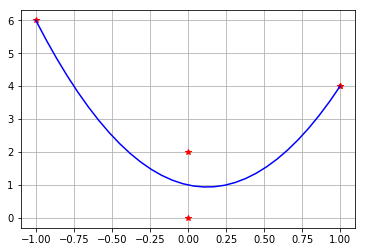

In [10]:
plt.plot(x_train,y_train,'*',color='red')
plt.plot(x_points1,y_points1,color='blue')
plt.grid()

3) Построим модель $f(x) = \beta_0+\beta_1x+\beta_2x^2$ методом ридж-регрессии

In [11]:
x_train = [1, 1, 0, 0, -1]
y_train = [4, 4, 0 ,2,  6]
l = 1


In [12]:
f = lambda x: [x**0, x**1, x**2]
X = np.array(map(f,x_train))
y = np.array(y_train).transpose()#column
  

Получили систему линейных уравнений $X\beta = y$. Умножим обе части слева на $X^T$: 

In [13]:
Xtr = X.transpose()
X = np.dot(Xtr,X)
y = np.dot(Xtr,y)


Регуляризуем систему с параметром $\lambda = 1$:

In [14]:
for i in xrange(len(X[:])):
    X[i,i] = X[i,i]+l
X  

array([[6, 1, 3],
       [1, 4, 1],
       [3, 1, 4]])

Решим регуляризованную систему:

In [15]:
beta = np.linalg.solve(X,y)
beta

array([ 1.5, -0.5,  2.5])

Построим график полученной модели.

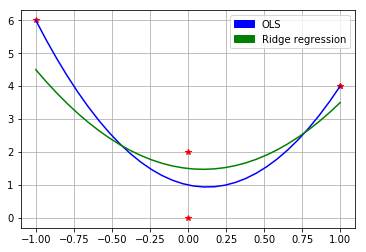

In [16]:
f = lambda x: [beta[0]+beta[1]*x+beta[2]*x*x]
x_points2 = np.linspace(-1,1,30)
y_points2 = map(f,x_points2)
import matplotlib.patches as mpatches
plt.plot(x_train,y_train,'*',color='red')
plt.plot(x_points1,y_points1,color='blue')
plt.plot(x_points2,y_points2,color='green')
plt.grid()
patch_blue = mpatches.Patch(color='blue', label='OLS')
patch_green = mpatches.Patch(color='green', label='Ridge regression')
plt.legend(handles=[patch_blue,patch_green])
plt.show()

# Задача 14
Дана обучающая выборка 
<table>
    <tr>
        <td>$x_1$</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>$x_2$</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>$y$</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
</table>

С помощью наивного байесова классификатора оценить вероятности 
$Pr(Y = 0 | X_1 = 1, X_2 = 1)$; $Pr(Y = 1 | X_1 = 1, X_2 = 1)$

In [17]:
x1 = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0])
x2 = np.array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1])
y  = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


Найдем априорные вероятности $Pr(y=0)$ и $Pr(y=1)$:

In [18]:
Py_eq_0 = float(len(np.where(y == 0)[0]))/len(y)
Py_eq_1 = float(len(np.where(y == 1)[0]))/len(y)
Py_eq_0,Py_eq_1

(0.5, 0.5)

Найдем маргинальные апостериорные вероятности:
$Pr(x_1 = 1| y = 0)$,$Pr(x_2 = 1| y = 0)$

In [19]:
Px1_eq1_if_y_eq0 = float(len(np.where((x1 == 1)&(y == 0))[0]))/len(np.where(y == 0)[0])
Px2_eq1_if_y_eq0 = float(len(np.where((x2 == 1)&(y == 0))[0]))/len(np.where(y == 0)[0])
Px2_eq1_if_y_eq0,Px1_eq1_if_y_eq0


(0.6, 0.4)

Найдем $Pr(x_1 = 1)$ и $Pr(x_2 = 1)$

In [20]:
Px1_eq1 = float(len(np.where(x1 == 1)[0]))/len(x1)
Px2_eq1 = float(len(np.where(x2 == 1)[0]))/len(x2)
Px1_eq1,Px2_eq1

(0.5, 0.8)

Найдем апостериорные вероятности по формуле Байеса:

In [21]:
Py_eq0_if_x1_eq1_x2_eq1 = Px1_eq1_if_y_eq0*Px2_eq1_if_y_eq0*Py_eq_0/(Px1_eq1+Px2_eq1)
Py_eq1_if_x1_eq1_x2_eq1 = Px1_eq1_if_y_eq0*Px2_eq1_if_y_eq0*Py_eq_1/(Px1_eq1+Px2_eq1)
Py_eq0_if_x1_eq1_x2_eq1,Py_eq1_if_x1_eq1_x2_eq1

(0.0923076923076923, 0.0923076923076923)

Ответ:$Pr(y = 0|x_1 = 1,x_2 = 1) = 0.0923$ $Pr(y = 1|x_1 = 1,x_2 = 1) = 0.0923$ 

# Задача 29
Может ли использование коррелированных переменных улучшить качество предсказания? Рассмотрим задачу классификации с двумя классами. Пусть пространство признаков двумерное. Объекты каждого класса имеют нормальное распределение с математическим ожиданием (-1,-1) и (1,1) соответственно и единичной матрицей ковариации каждый. Априорные вероятности классов равны $1/2$.

1) Вычислить коэффициент корреляции для переменных $x_1$, $x_2$.

2) Найти байесов классификатор и вычислить байесову ошибку для усеченной задачи,рассматривая только одну переменную $x_1$.

3) Найти байесов классификатор и вычислить байесову ошибку для исходной задачи.

4) Приводит ли использование второй переменной к уменьшению ошибки?

In [22]:
from sklearn.naive_bayes import GaussianNB

Сгенерируем выборки для первого и второго классов:

In [23]:
c1 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],300) #y = 0
c1



array([[ -2.52462631e+00,  -1.77513155e+00],
       [ -2.10636718e+00,   6.00577852e-01],
       [ -4.14387999e+00,  -1.46256355e+00],
       [ -6.31235324e-01,  -1.51775128e+00],
       [ -3.72410065e-01,  -4.78978135e-01],
       [ -1.19941978e+00,  -1.86032778e+00],
       [ -2.39413972e+00,  -7.57902683e-01],
       [ -6.71289320e-01,  -1.40936585e+00],
       [ -1.68983254e+00,  -9.17384642e-01],
       [  1.40158580e+00,  -1.67155282e+00],
       [  3.84616121e-01,   1.71228854e-01],
       [ -1.77545160e+00,  -6.59236098e-01],
       [  6.26581474e-01,  -1.59618524e+00],
       [ -9.11257281e-03,  -4.19725514e-01],
       [ -1.48861385e+00,   1.67967120e+00],
       [ -1.10858251e+00,  -1.14026995e+00],
       [ -1.41507271e+00,  -4.96278964e-01],
       [ -1.20489207e+00,   3.40759509e-02],
       [ -1.60473826e-01,  -5.39473942e-01],
       [ -1.49796804e+00,   7.62558934e-01],
       [ -8.40375050e-01,  -2.05516267e+00],
       [ -1.25244626e+00,  -1.31468374e+00],
       [ -

In [24]:
c2 = np.random.multivariate_normal([1, 1],[[1,0],[0,1]],300)#y = 1
c2


array([[ 0.75223293, -0.03899464],
       [ 0.24604659,  1.45229475],
       [ 1.05310671,  0.22594342],
       [ 0.80671675,  1.98857299],
       [ 1.36884754, -0.39998714],
       [ 0.7234548 , -0.82235893],
       [ 1.27168996,  1.55746264],
       [ 1.79997958,  1.42453276],
       [-0.42029456,  0.56880545],
       [ 2.78169083, -0.88705826],
       [ 2.21768609,  1.38811803],
       [ 0.9348168 , -0.21782532],
       [ 3.65194545,  0.49691243],
       [ 2.10471216,  2.20106491],
       [ 2.71872853,  0.61747133],
       [ 0.20524841,  1.20922112],
       [ 1.15197537,  1.21151044],
       [ 1.19995134,  0.67471508],
       [ 0.04830238,  0.95781985],
       [ 0.30967837,  1.5958063 ],
       [ 2.46364066,  1.60432919],
       [ 1.78749311,  0.9756772 ],
       [ 2.48668253,  0.54059291],
       [ 1.28041379,  0.85784032],
       [ 1.6381351 ,  1.70656028],
       [-0.67056538,  1.95835215],
       [ 1.07463619,  2.15367964],
       [-0.48658693, -1.12967091],
       [ 1.25135489,

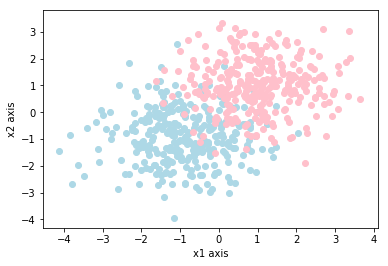

In [25]:
plt.scatter(c1[:,0],c1[:,1],color='lightblue')
plt.scatter(c2[:,0],c2[:,1],color='pink')
plt.xlabel('x1 axis')
plt.ylabel('x2 axis')

1) Составим $x_1$ и $x_2$ и найдем коэффициент корреляции между ними:

In [26]:
x1x2 = np.vstack((c1,c2))
x1 = np.array(x1x2[:,0])
x2 = np.array(x1x2[:,1])
np.corrcoef(x1,x2)

array([[ 1.        ,  0.47529999],
       [ 0.47529999,  1.        ]])

Ответ: $r_{x_1x_2} = 0.42220159,$

Сгененрируем массив $y$ , $y = 0$, если объект принадлежит первому классу,и $y = 1$,если объект принадлежит второму классу. $Pr(y = 0) = Pr(y = 1) = 1/2$

In [27]:
y =np.array([0]*600) 
y[300:601] = 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

2) Построим наивный байесовский классификатор, используя только $x_1$

In [28]:
model = GaussianNB()
X=x1.reshape(-1,1)
model.fit(X, y)

GaussianNB(priors=None)

Сгенерируем тестовую выборку:

In [29]:

c1 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],700)
c2 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],700)
x1x2_test = np.vstack((c1,c2))

x_test=x1x2_test[:,0].reshape(-1,1)
y_test=np.array([0]*1400)
y_test[700:1401] = 1


Hайдем баесову ошибку:

In [30]:
from sklearn.metrics import log_loss
y_predicted = model.predict(x_test)
log_loss(y_test,y_predicted)

17.195435361277184

Ответ $R(x) = 17.516$

3) Построим наивный байесовский классификатор используя обе переменные $x_1 x_2$

In [31]:
model = GaussianNB()
X=x1x2
model.fit(X, y)

GaussianNB(priors=None)

и найдем ошибку для этого случая:

In [32]:
x_test = x1x2_test
y_predicted = model.predict(x_test)
log_loss(y_test,y_predicted)

17.688820751287079

Ответ $R(x) = 17.269$

4)Ответ: нет